# Benchmarks

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from matplotlib.ticker import ScalarFormatter

In [71]:
methods = ['tmvec1', 'tmvec2', 'tmvec2_student', 'foldseek']
names = ['TM-Vec', 'TM-Vec 2', 'TM-Vec 2 Student', 'Foldseek']

In [72]:
tmvec1_times = [0.3553493581712246,
3.6675993213430047,
36.81747613847256,
183.44600402377546,
367.4659767560661]

In [73]:
tmvec2_times = [0.021002411531905334,
0.20721696565548578,
2.6197565821930766,
17.30313423803697,
26.886962222556274]

In [74]:
tmvec2_student_times = [0.019774652707080047,
0.02359441326310237,
0.19555904436856508,
0.9846283647542199,
1.9633024039988716]

In [75]:
foldseek_times = [0.17100162183245024,
0.32978160430987674,
4.157830275905629,
30.498531013106305,
68.13153044258554]

Encoding

In [76]:
# Create dataframe from timing arrays
sequences = [10, 100, 1000, 5000, 10000]

df = pd.DataFrame({
    'sequences': sequences,
    'tmvec2': tmvec2_times,
    'foldseek': foldseek_times,
    'tmvec2_student': tmvec2_student_times,
    'tmvec1': tmvec1_times
})

In [77]:
df_melt = df.melt(id_vars='sequences', var_name='method', value_name='runtime')

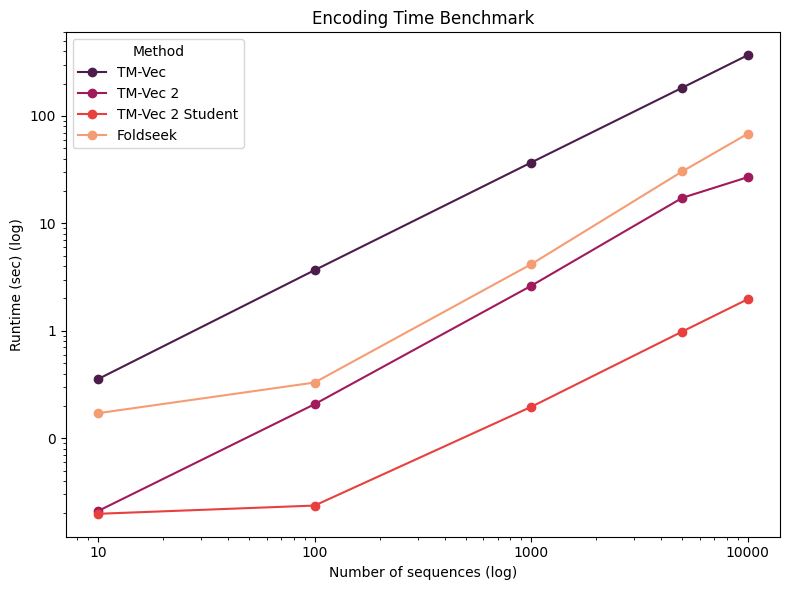

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

n_methods = len(methods)
colors = sns.color_palette("rocket", n_colors=n_methods)

plt.figure(figsize=(8, 6))
for method, name, color in zip(methods, names, colors):
    df_ = df_melt.query(f'method == "{method}"')
    plt.plot('sequences', 'runtime', data=df_, marker='o', label=name, color=color)

plt.legend(title='Method')
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of sequences (log)')
plt.ylabel('Runtime (sec) (log)')
plt.title('Encoding Time Benchmark')
plt.tight_layout()
plt.savefig('encoding.svg')

Query

In [79]:
df = pd.read_csv('bench/query.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'bench/query.csv'

In [ ]:
df_melt = df.melt(id_vars=['query_size', 'db_size'], var_name='method', value_name='runtime')

In [ ]:
db_sizes = [1000, 10000, 100000]

In [ ]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(7, 4))
for i, size in enumerate(db_sizes):
    ax = axes[i]
    for method in methods:
        df_ = df_melt.query(f'db_size == {size} & method == "{method}"')
        ax.plot('query_size', 'runtime', data=df_, marker='o')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    if i == 0:
        ax.set_ylabel('Runtime (sec) (log)')
        ax.set_yscale('log')
        ax.yaxis.set_major_formatter(ScalarFormatter())
    if i == 1:
        ax.set_xlabel('Number of query sequences (log)')
    ax.set_title(f'Database size: {int(size / 1000)}k')
fig.tight_layout()
fig.savefig('plots/query.svg')